# Preparação Busca Hiper Parâmetros


Normalizar:

K-NN --- FEITO MESMO

LVQ (Learning Vector Quantization) --- Desgraça

Comitê Heterogêneo (Stacking) --- FEITO MESMO

SVM (Support Vector Machine) --- FEITO MESMO

Rede Neural MLP (Multilayer Perceptron) --- FEITO MESMO

Não Normalizar:

Random Forest --- FEITO MESMO

Comitê de Redes Neurais Artificiais --- FEITO MESMO

Árvore de Decisão --- FEITO MESMO

XGBoost --- FEITO MESMO

LightGBM --- FEITO MESMO mas overfitting

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
import joblib

In [ ]:
arff_file = arff.loadarff('house_16H.arff')
df = pd.DataFrame(arff_file[0])
df['binaryClass'] = df["binaryClass"].map({b'N': 0, b'P': 1})

In [ ]:
X = df.iloc[:, :-1]
y = df['binaryClass']
y

0        0
1        1
2        1
3        1
4        1
        ..
22779    1
22780    1
22781    0
22782    1
22783    0
Name: binaryClass, Length: 22784, dtype: int64

In [ ]:
X_tr_og, _, y_tr, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_tr_og_norm = RobustScaler().fit_transform(X_tr_og)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=42,
                                                     stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2,
                                                  random_state=42, stratify=y_train)



In [ ]:
X_train_norm = RobustScaler().fit_transform(X_train)
X_val_norm = RobustScaler().fit_transform(X_val)
X_test_norm = RobustScaler().fit_transform(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

StratifiedKfold

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Função para estimativa de tempo

In [ ]:
from time import time

def tempo_execucao(modelo, param_grid, cv, X_train, y_train, n_rounds = 20):
    start = time()
    teste_tempo = RandomizedSearchCV(modelo, 
                                    param_distributions=param_grid,
                                    n_iter=5,
                                    cv=cv,
                                    scoring='f1',
                                    n_jobs=-1,
                                random_state=42).fit(X_train, y_train)
    tempo_estimado = time()-start
    tempo_total = (tempo_estimado * n_rounds)
    minutos, segundos = divmod(tempo_total, 60)
    print(f"Tempo de execução: {tempo_estimado:.2f} segundos, para uma iteração")
    print(f"Tempo de execução: {minutos:.0f} minutos e {segundos:.0f} segundos, para 20 iterações")


# Busca

Para comitês, a busca procura por quantidade ideal de modelos

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
param_grid = {
    'n_neighbors': np.arange(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

Estimativa de tempo

In [ ]:
tempo_execucao(knn, param_grid, cv, X_train_norm, y_train)

Tempo de execução: 5.32 segundos, para uma iteração
Tempo de execução: 1 minutos e 46 segundos, para 20 iterações


In [ ]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(knn, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train_norm, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

In [ ]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val_norm)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9115848007414272
Modelo 1: 0.911731843575419
Modelo 2: 0.9094963761382643
Modelo 3: 0.9117975437290659
Modelo 4: 0.9134651249533756
Modelo 5: 0.915324872134874
Modelo 6: 0.9135618479880775
Modelo 7: 0.9095300018577002
Modelo 8: 0.912
Modelo 9: 0.9095300018577002
Modelo 10: 0.910339706701318
Modelo 11: 0.9110986337263709
Modelo 12: 0.9157894736842105
Modelo 13: 0.9111811607639533
Modelo 14: 0.9134272300469484
Modelo 15: 0.9115898959881129
Modelo 16: 0.9134651249533756
Modelo 17: 0.9107806691449815
Modelo 18: 0.9099315701867949
Modelo 19: 0.9099315701867949


In [ ]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [ ]:
dic_modelos[f"modelo_{idx}"].best_params_

{'weights': 'uniform',
 'n_neighbors': 14,
 'metric': 'manhattan',
 'algorithm': 'ball_tree'}

In [ ]:
knn = dic_modelos[f"modelo_{idx}"].best_estimator_
knn

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=14)

In [ ]:
knn_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
knn_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
knn_mean_test_score, knn_std_test_score

(array([0.90760487, 0.8973062 , 0.90049753, 0.90468875, 0.90959953,
        0.90646514, 0.90090672, 0.89705038, 0.89832714, 0.8973062 ]),
 array([0.00353863, 0.00380848, 0.00360638, 0.00179217, 0.00258642,
        0.00292736, 0.00317177, 0.00355661, 0.00461136, 0.00380848]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

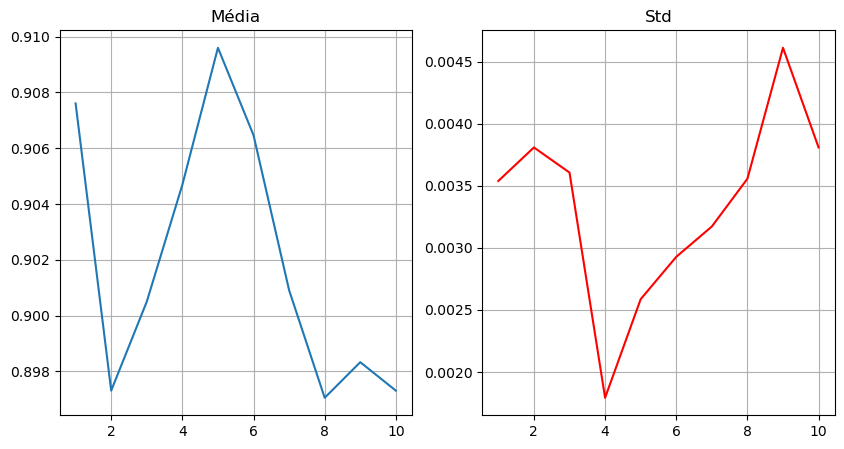

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(knn_mean_test_score)+1), y=knn_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(knn_std_test_score)+1), y=knn_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [ ]:
knn.fit(X_tr_og_norm, y_tr)

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=14)

In [ ]:
joblib.dump(knn, "/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/knn.pkl")

In [ ]:
#treinamento
y_pred_train = knn.predict(X_tr_og_norm)

In [ ]:
#teste
y_pred = knn.predict(X_test_norm)

Acurácia

In [ ]:
#treinamento
treinamento_acc = knn.score(X_tr_og_norm, y_tr)

In [ ]:
#teste
teste_acc = knn.score(X_test_norm, y_test)

F1-score

In [ ]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [ ]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [ ]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_precision = precision_score(y_test, y_pred)

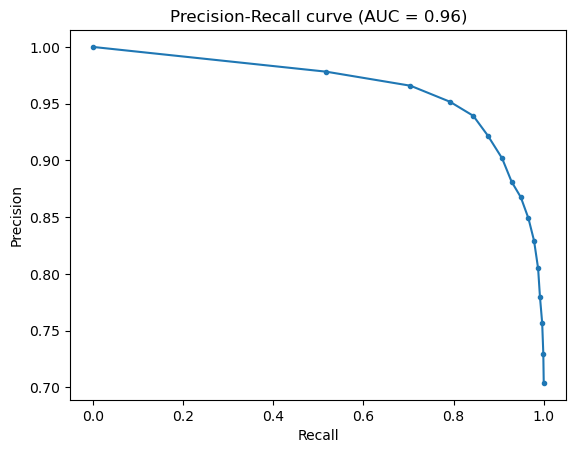

In [ ]:
from sklearn.metrics import auc
y_scores = knn.predict_proba(X_test_norm)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [ ]:
modelo, etapa, acc, f1, recall, precision, auc = ["knn", "knn"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_knn = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_knn

,modelo,etapa,métrica,valor
0,knn,treino,accuracy,0.889450
1,knn,teste,accuracy,0.861751
2,knn,treino,f1,0.923556
3,knn,teste,f1,0.904372
4,knn,treino,recall,0.948566
5,knn,teste,recall,0.928616
6,knn,treino,precision,0.899830
7,knn,teste,precision,0.881361
8,knn,treino,auc,0.000000
9,knn,teste,auc,0.963865


In [ ]:
df_long_knn.to_csv("/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/data/df_long_knn.csv", index=False)

<Axes: xlabel='métrica', ylabel='valor'>

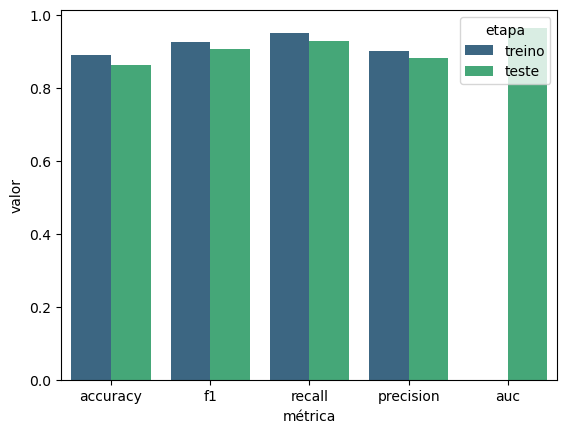

In [ ]:
sns.barplot(df_long_knn, x="métrica", y="valor", hue="etapa", palette="viridis")

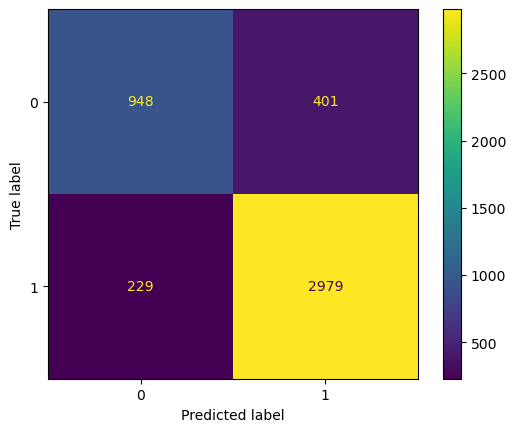

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## SVC

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=42)

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 15, 20, 25, 30, 35, 40, 50],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1','l2'],  
    'dual': [False, True],  
    'max_iter': [1000, 5000, 10000]
}

Estimativa de tempo

In [ ]:
tempo_execucao(svc, param_grid, cv, X_train_norm, y_train)

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 321, in fit
    self.coef_, se

Tempo de execução: 24.21 segundos, para uma iteração
Tempo de execução: 8 minutos e 4 segundos, para 20 iterações


c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(svc, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train_norm, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 321, in fit
    self.coef_, s

In [ ]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val_norm)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.8884297520661157
Modelo 1: 0.8903980381060177
Modelo 2: 0.8891825561638663
Modelo 3: 0.8892668178382465
Modelo 4: 0.8892713711990821
Modelo 5: 0.8841090302243649
Modelo 6: 0.8748396554883636
Modelo 7: 0.8884381338742393
Modelo 8: 0.8851414652426457
Modelo 9: 0.890188679245283
Modelo 10: 0.8871117723637716
Modelo 11: 0.8875983514424878
Modelo 12: 0.8456076283221748
Modelo 13: 0.8926875593542261
Modelo 14: 0.8911191062298807
Modelo 15: 0.8873398643556896
Modelo 16: 0.8913500095474508
Modelo 17: 0.890188679245283
Modelo 18: 0.890188679245283
Modelo 19: 0.8892668178382465


In [ ]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [ ]:
dic_modelos[f"modelo_{idx}"].best_params_


{'penalty': 'l2', 'max_iter': 10000, 'loss': 'hinge', 'dual': True, 'C': 20}

In [ ]:
svc = dic_modelos[f"modelo_{idx}"].best_estimator_
svc

LinearSVC(C=20, dual=True, loss='hinge', max_iter=10000, random_state=42)

In [ ]:
svc_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
svc_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
svc_mean_test_score, svc_std_test_score

(array([       nan,        nan, 0.8778793 ,        nan, 0.88049334,
               nan, 0.87770117,        nan,        nan, 0.87663159]),
 array([       nan,        nan, 0.00215486,        nan, 0.00509182,
               nan, 0.00273457,        nan,        nan, 0.00209053]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

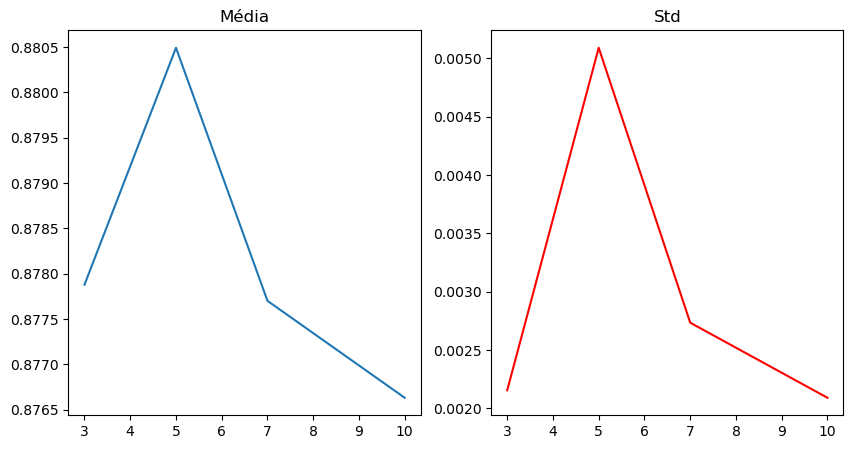

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(svc_mean_test_score)+1), y=svc_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1,len(svc_std_test_score)+1), y=svc_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[0].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [ ]:
svc.fit(X_tr_og_norm, y_tr)

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=20, dual=True, loss='hinge', max_iter=10000, random_state=42)

In [ ]:
joblib.dump(svc, "/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/svc.pkl")

In [ ]:
#treinamento
y_pred_train = svc.predict(X_tr_og_norm)

In [ ]:
#teste
y_pred = svc.predict(X_test_norm)

Acurácia

In [ ]:
#treinamento
treinamento_acc = svc.score(X_tr_og_norm, y_tr)

In [ ]:
#teste
teste_acc = svc.score(X_test_norm, y_test)

F1-score

In [ ]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [ ]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [ ]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_precision = precision_score(y_test, y_pred)

In [ ]:
'''y_scores = svc.predict_proba(X_test_norm)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()'''


"y_scores = svc.predict_proba(X_test_norm)[:, 1]\nprecision, recall, thresholds = precision_recall_curve(y_test, y_scores)\npr_auc = auc(recall, precision)\n\nplt.plot(recall, precision, marker='.')\nplt.xlabel('Recall')\nplt.ylabel('Precision')\nplt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')\nplt.show()"

In [ ]:
modelo, etapa, acc, f1, recall, precision, auc = ["svc", "svc"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [pd.NA, pd.NA]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision
})

df_long_svc = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_svc

,modelo,etapa,métrica,valor
0,svc,treino,accuracy,0.829868
1,svc,teste,accuracy,0.830590
2,svc,treino,f1,0.883906
3,svc,teste,f1,0.883770
4,svc,treino,recall,0.919966
5,svc,teste,recall,0.914900
6,svc,treino,precision,0.850566
7,svc,teste,precision,0.854688


In [ ]:
df_long_svc.to_csv("/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/data/df_long_svc.csv", index=False)

<Axes: xlabel='métrica', ylabel='valor'>

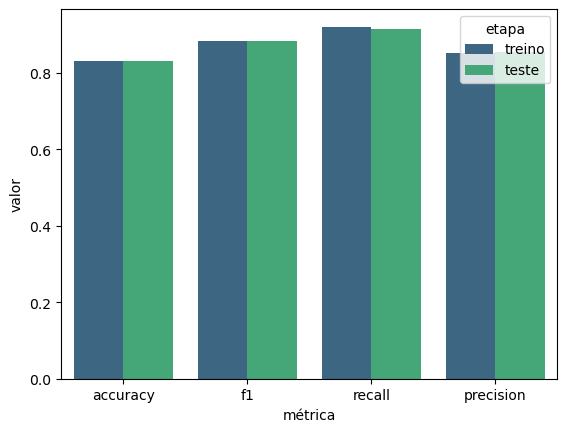

In [ ]:
sns.barplot(df_long_svc, x="métrica", y="valor", hue="etapa", palette="viridis")

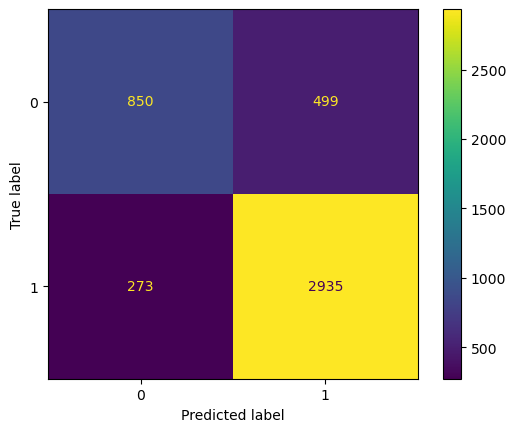

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42, early_stopping=True)

In [ ]:
param_grid = {
    "hidden_layer_sizes": [(125,), (100,), (50,), (25,), (10,)],
    "activation":   ['identity', 'logistic', 'tanh', 'relu'],
    "solver": ['lbfgs', 'sgd', 'adam'],
    "batch_size": [16, 32, 64, 128],
    "learning_rate": ['constant', 'invscaling', 'adaptive']
}

Estimativa de tempo

In [ ]:
tempo_execucao(mlp, param_grid, cv, X_train_norm, y_train)

Tempo de execução: 93.65 segundos, para uma iteração
Tempo de execução: 31 minutos e 13 segundos, para 20 iterações


c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(mlp, 
                                param_distributions=param_grid,
                                n_iter=5,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train_norm, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

In [ ]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val_norm)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9261538461538461
Modelo 1: 0.9280339571676636
Modelo 2: 0.9248018557896772
Modelo 3: 0.9285026016573521
Modelo 4: 0.9245610650202586
Modelo 5: 0.9239382239382239
Modelo 6: 0.9260536398467433
Modelo 7: 0.9248018557896772
Modelo 8: 0.9204178537511871
Modelo 9: 0.9271676300578034
Modelo 10: 0.9242072699149265
Modelo 11: 0.9140565317035906
Modelo 12: 0.9270651963629328
Modelo 13: 0.9270651963629328
Modelo 14: 0.9261538461538461
Modelo 15: 0.9280339571676636
Modelo 16: 0.9282960678488821
Modelo 17: 0.9270651963629328
Modelo 18: 0.9244052187260169
Modelo 19: 0.9236084452975047


In [ ]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [ ]:
dic_modelos[f"modelo_{idx}"].best_params_


{'solver': 'lbfgs',
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (50,),
 'batch_size': 32,
 'activation': 'logistic'}

In [ ]:
mlp = dic_modelos[f"modelo_{idx}"].best_estimator_
mlp

MLPClassifier(activation='logistic', batch_size=32, early_stopping=True,
              hidden_layer_sizes=(50,), learning_rate='adaptive',
              random_state=42, solver='lbfgs')

In [ ]:
mlp_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
mlp_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
mlp_mean_test_score, mlp_std_test_score

(array([0.9126353 , 0.9170716 , 0.84164576, 0.82666049, 0.91685528]),
 array([0.00439157, 0.00248644, 0.00227497, 0.00043019, 0.00379301]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

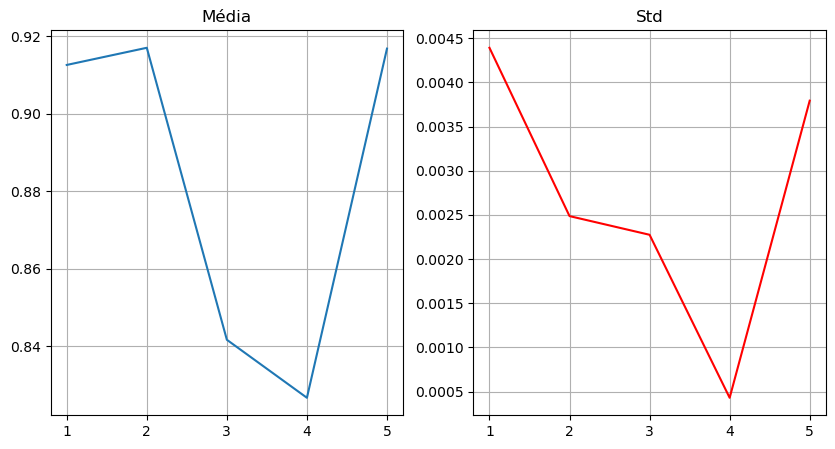

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(mlp_mean_test_score)+1), y=mlp_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(mlp_std_test_score)+1), y=mlp_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [ ]:
mlp.fit(X_tr_og_norm, y_tr)

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', batch_size=32, early_stopping=True,
              hidden_layer_sizes=(50,), learning_rate='adaptive',
              random_state=42, solver='lbfgs')

In [ ]:
joblib.dump(mlp, "/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/mlp.pkl")

In [ ]:
#treinamento
y_pred_train = mlp.predict(X_tr_og_norm)

In [ ]:
#teste
y_pred = mlp.predict(X_test_norm)

Acurácia

In [ ]:
#treinamento
treinamento_acc = mlp.score(X_tr_og_norm, y_tr)

In [ ]:
#teste
teste_acc = mlp.score(X_test_norm, y_test)

F1-score

In [ ]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [ ]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [ ]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_precision = precision_score(y_test, y_pred)

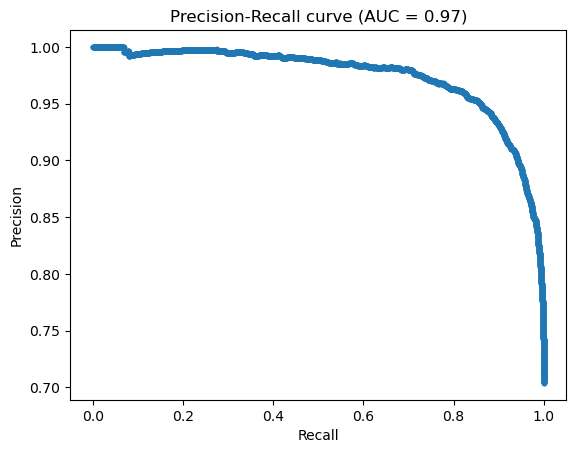

In [ ]:
from sklearn.metrics import auc
y_scores = mlp.predict_proba(X_test_norm)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [ ]:
modelo, etapa, acc, f1, recall, precision, auc = ["mlp", "mlp"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_mlp = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_mlp

,modelo,etapa,métrica,valor
0,mlp,treino,accuracy,0.906841
1,mlp,teste,accuracy,0.884134
2,mlp,treino,f1,0.934445
3,mlp,teste,f1,0.918038
4,mlp,treino,recall,0.943111
5,mlp,teste,recall,0.921758
6,mlp,treino,precision,0.925937
7,mlp,teste,precision,0.914348
8,mlp,treino,auc,0.000000
9,mlp,teste,auc,0.974419


In [ ]:
df_long_mlp.to_csv("/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/data/df_long_mlp.csv", index=False)

<Axes: xlabel='métrica', ylabel='valor'>

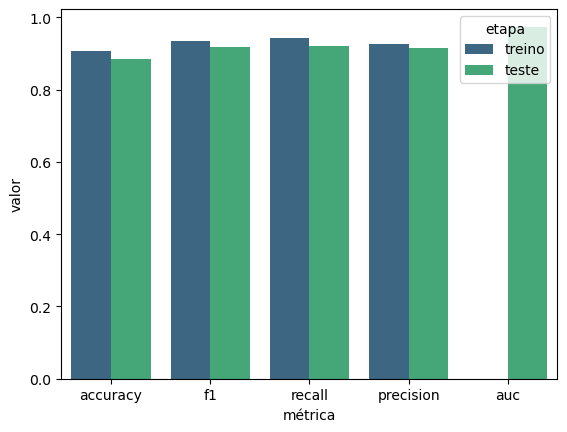

In [ ]:
sns.barplot(df_long_mlp, x="métrica", y="valor", hue="etapa", palette="viridis")

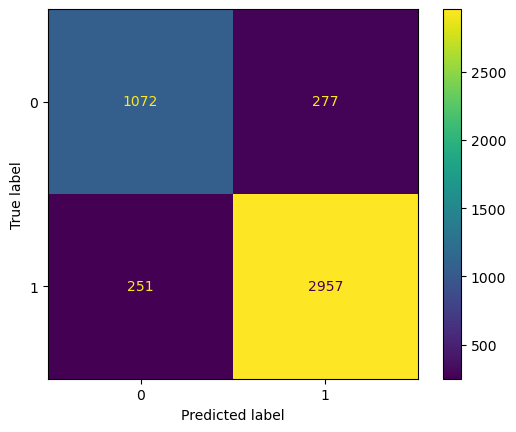

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)

In [ ]:
param_grid = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    "splitter": ['best', 'random'],
    "max_depth": np.arange(1    , 17),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    "max_features": np.arange(1, 17),
    "max_leaf_nodes": np.arange(2, 20),
    "class_weight": ['balanced', None]
}

Estimativa de tempo

In [ ]:
tempo_execucao(tree, param_grid, cv, X_train, y_train)

Tempo de execução: 6.42 segundos, para uma iteração
Tempo de execução: 2 minutos e 8 segundos, para 20 iterações


In [ ]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(tree, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

In [ ]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.8591404482829529
Modelo 1: 0.8786898503841488
Modelo 2: 0.8729192042224929
Modelo 3: 0.8710415871804654
Modelo 4: 0.8923732094463802
Modelo 5: 0.8819210160746179
Modelo 6: 0.8723741577487119
Modelo 7: 0.881079027355623
Modelo 8: 0.8852459016393442
Modelo 9: 0.8973471741637832
Modelo 10: 0.8701561065197428
Modelo 11: 0.8853087840429612
Modelo 12: 0.8850118953211736
Modelo 13: 0.8852459016393442
Modelo 14: 0.8865578865578866
Modelo 15: 0.852177554438861
Modelo 16: 0.8841033672670321
Modelo 17: 0.881328797278367
Modelo 18: 0.8859140859140859
Modelo 19: 0.8660764739122245


In [ ]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [ ]:
dic_modelos[f"modelo_{idx}"].best_params_

{'splitter': 'best',
 'min_samples_split': 15,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 13,
 'max_features': 14,
 'max_depth': 8,
 'criterion': 'gini',
 'class_weight': None}

In [ ]:
tree = dic_modelos[f"modelo_{idx}"].best_estimator_
tree

DecisionTreeClassifier(max_depth=8, max_features=14, max_leaf_nodes=13,
                       min_samples_leaf=3, min_samples_split=15,
                       random_state=42)

In [ ]:
tree_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
tree_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
tree_mean_test_score, tree_std_test_score

(array([0.88741848, 0.86042428, 0.8820352 , 0.55623114, 0.85599798,
        0.48030532, 0.79173156, 0.57784531, 0.83778386, 0.82742181]),
 array([0.00335749, 0.0121506 , 0.00586925, 0.02779065, 0.0020298 ,
        0.00825062, 0.00735839, 0.02627091, 0.01344937, 0.00112468]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

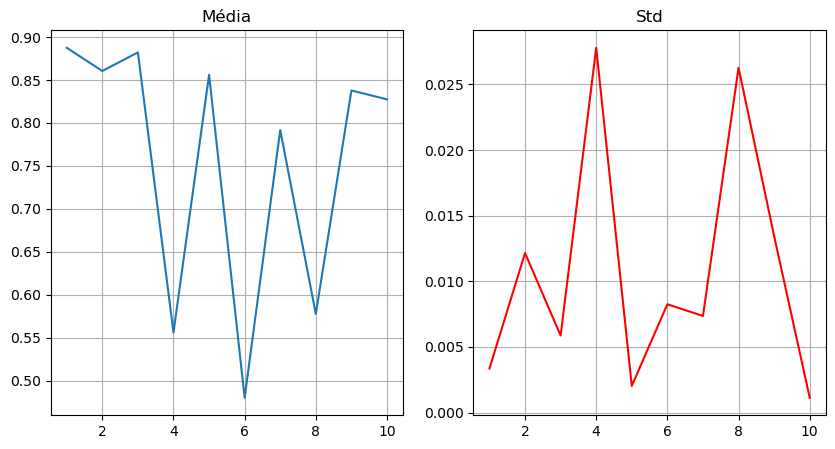

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(tree_mean_test_score)+1), y=tree_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(tree_std_test_score)+1), y=tree_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [ ]:
tree.fit(X_tr_og, y_tr)

DecisionTreeClassifier(max_depth=8, max_features=14, max_leaf_nodes=13,
                       min_samples_leaf=3, min_samples_split=15,
                       random_state=42)

In [ ]:
joblib.dump(tree, "/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/tree.pkl")

In [ ]:
#treinamento
y_pred_train = tree.predict(X_tr_og)

In [ ]:
#teste
y_pred = tree.predict(X_test)

Acurácia

In [ ]:
#treinamento
treinamento_acc = tree.score(X_tr_og, y_tr)

In [ ]:
#teste
teste_acc = tree.score(X_test, y_test)

F1-score

In [ ]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [ ]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [ ]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_precision = precision_score(y_test, y_pred)

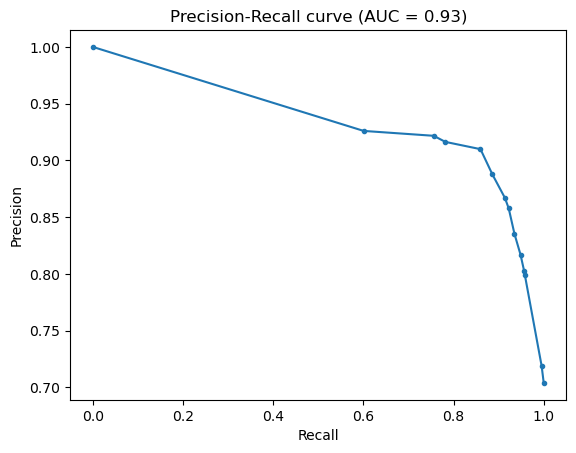

In [ ]:
from sklearn.metrics import auc
y_scores = tree.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [ ]:
modelo, etapa, acc, f1, recall, precision, auc = ["tree", "tree"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_tree = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_tree

,modelo,etapa,métrica,valor
0,tree,treino,accuracy,0.847479
1,tree,teste,accuracy,0.841343
2,tree,treino,f1,0.888362
3,tree,teste,f1,0.884116
4,tree,treino,recall,0.861986
5,tree,teste,recall,0.859726
6,tree,treino,precision,0.916404
7,tree,teste,precision,0.909931
8,tree,treino,auc,0.000000
9,tree,teste,auc,0.933402


In [ ]:
df_long_tree.to_csv("/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/data/df_long_tree.csv", index=False)

<Axes: xlabel='métrica', ylabel='valor'>

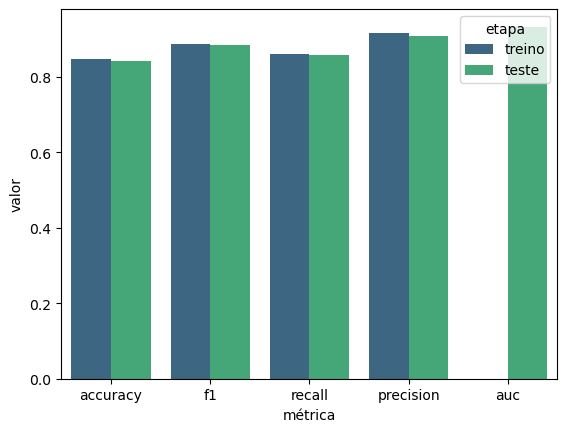

In [ ]:
sns.barplot(df_long_tree, x="métrica", y="valor", hue="etapa", palette="viridis")

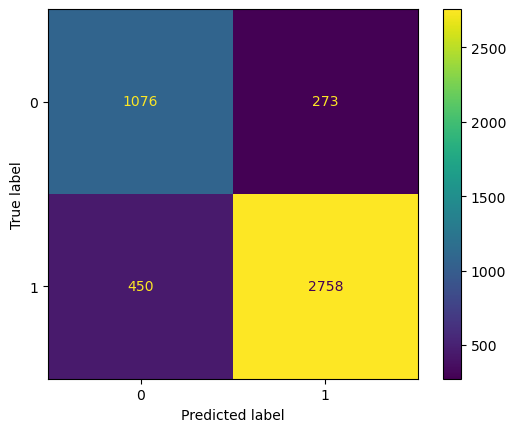

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    "n_estimators": np.arange(10, 151, 10),
    "bootstrap": [True, False],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": np.arange(1, 17),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    "max_features": np.arange(1, 17),
    "max_leaf_nodes": np.arange(2, 20),
    "class_weight": ['balanced', None]
}

Estimativa de tempo

In [ ]:
tempo_execucao(forest, param_grid, cv, X_train_norm, y_train)

Tempo de execução: 14.32 segundos, para uma iteração
Tempo de execução: 4 minutos e 46 segundos, para 20 iterações


In [ ]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(forest, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

In [ ]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9060646642433519
Modelo 1: 0.909706546275395
Modelo 2: 0.9085400492330998
Modelo 3: 0.9048882152330429
Modelo 4: 0.9076718065867123
Modelo 5: 0.9064994298745724
Modelo 6: 0.9100569259962049
Modelo 7: 0.9088482074752098
Modelo 8: 0.8975317875841436
Modelo 9: 0.8758773550055412
Modelo 10: 0.9056533133657806
Modelo 11: 0.9102001906577694
Modelo 12: 0.8995999237950085
Modelo 13: 0.9115516584064048
Modelo 14: 0.9035418236623964
Modelo 15: 0.9102661596958175
Modelo 16: 0.906559877955759
Modelo 17: 0.9076576576576577
Modelo 18: 0.9071816988561785
Modelo 19: 0.8925019127773527


In [ ]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [ ]:
dic_modelos[f"modelo_{idx}"].best_params_

{'n_estimators': 130,
 'min_samples_split': 17,
 'min_samples_leaf': 13,
 'max_leaf_nodes': 16,
 'max_features': 7,
 'max_depth': 14,
 'criterion': 'gini',
 'class_weight': None,
 'bootstrap': False}

In [ ]:
forest = dic_modelos[f"modelo_{idx}"].best_estimator_
forest

RandomForestClassifier(bootstrap=False, max_depth=14, max_features=7,
                       max_leaf_nodes=16, min_samples_leaf=13,
                       min_samples_split=17, n_estimators=130, random_state=42)

In [ ]:
forest_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
forest_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
forest_mean_test_score, forest_std_test_score

(array([0.84499138, 0.89882101, 0.90342425, 0.83813764, 0.84540773,
        0.89339972, 0.83622746, 0.83983891, 0.86530334, 0.85168269]),
 array([0.01531149, 0.00258814, 0.00183438, 0.0069523 , 0.00607874,
        0.00403309, 0.01858829, 0.00050574, 0.00504123, 0.00254574]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

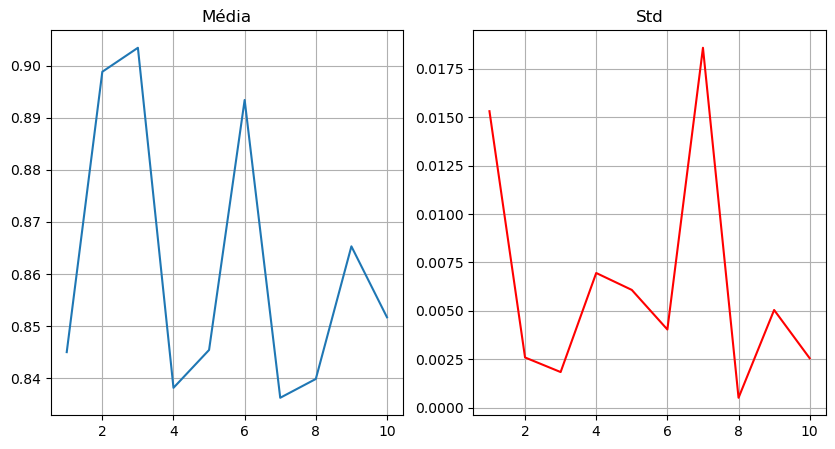

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(forest_mean_test_score)+1), y=forest_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(forest_std_test_score)+1), y=forest_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [ ]:
forest.fit(X_tr_og, y_tr)

RandomForestClassifier(bootstrap=False, max_depth=14, max_features=7,
                       max_leaf_nodes=16, min_samples_leaf=13,
                       min_samples_split=17, n_estimators=130, random_state=42)

In [ ]:
joblib.dump(forest, "/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/forest.pkl")

In [ ]:
#treinamento
y_pred_train = forest.predict(X_tr_og)

In [ ]:
#teste
y_pred = forest.predict(X_test)

Acurácia

In [ ]:
#treinamento
treinamento_acc = forest.score(X_tr_og, y_tr)

In [ ]:
#teste
teste_acc = forest.score(X_test, y_test)

F1-score

In [ ]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [ ]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [ ]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_precision = precision_score(y_test, y_pred)

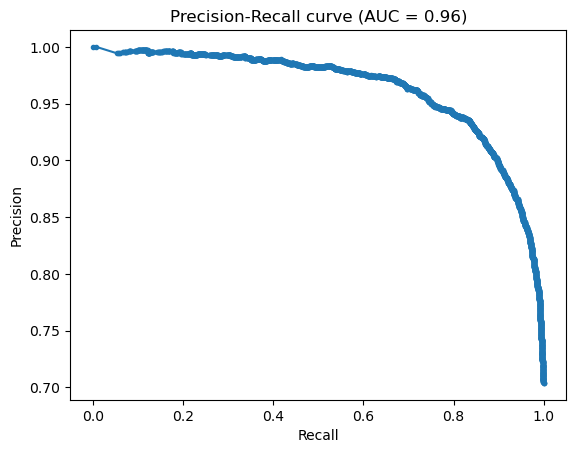

In [ ]:
from sklearn.metrics import auc
y_scores = forest.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [ ]:
modelo, etapa, acc, f1, recall, precision, auc = ["forest", "forest"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_forest = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_forest

,modelo,etapa,métrica,valor
0,forest,treino,accuracy,0.871345
1,forest,teste,accuracy,0.856704
2,forest,treino,f1,0.910267
3,forest,teste,f1,0.899770
4,forest,treino,recall,0.926901
5,forest,teste,recall,0.913653
6,forest,treino,precision,0.894218
7,forest,teste,precision,0.886302
8,forest,treino,auc,0.000000
9,forest,teste,auc,0.963163


In [ ]:
df_long_forest.to_csv("/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/data/df_long_forest.csv", index=False)

<Axes: xlabel='métrica', ylabel='valor'>

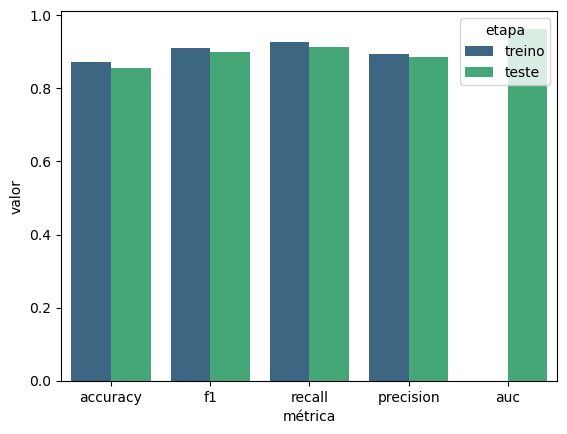

In [ ]:
sns.barplot(df_long_forest, x="métrica", y="valor", hue="etapa", palette="viridis")

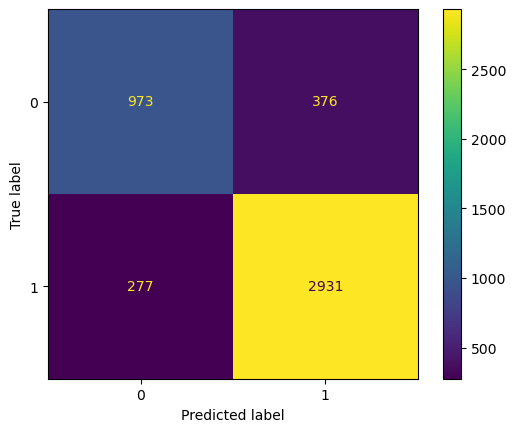

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Comitê de redes neurais

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
def generate_mlp_models(n_models):
    """Gera uma lista de MLPs com hiperparâmetros aleatórios."""
    return [
        MLPClassifier(
            hidden_layer_sizes=random.choice([(50,), (100,), (50, 50)]),  # Usando random.choice()
            activation=random.choice(['relu', 'tanh']),
            alpha=random.choice([0.0001, 0.001, 0.01]),
            solver=random.choice(['adam', 'sgd']),
            random_state=i,
            early_stopping=True
        ) for i in range(n_models)
    ]

In [ ]:
def random_select(lista_modelos):
    lista = np.random.choice(lista_modelos, size=np.random.randint(2,len(lista_modelos)), replace=False)
    return [(f"mlp_{i}", model) for i, model in enumerate(lista)]

In [ ]:
n_executions = 10
dic_modelos = {}
for i in range(n_executions):
    print(f"\n🔄 Rodando RandomizedSearchCV - Execução {i+1}/{n_executions} 🔄")

    mlp_models = generate_mlp_models(10) 
    selected_models = random_select(mlp_models)  
    voting_clf = VotingClassifier(estimators=selected_models)

    param_distributions = {"voting": ['soft', 'hard']}

    modelo = RandomizedSearchCV(
        estimator=voting_clf,
        param_distributions=param_distributions,
        n_iter=2, 
        cv=cv,
        scoring='f1',
        n_jobs=-1
    ).fit(X_train_norm, y_train)
    dic_modelos[f"modelo_{i}"] = modelo


🔄 Rodando RandomizedSearchCV - Execução 1/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 2/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 3/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 4/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 5/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 6/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 7/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 8/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 9/10 🔄

🔄 Rodando RandomizedSearchCV - Execução 10/10 🔄


In [ ]:
f1_scores = []
for i in range(10):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val_norm)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9275642263859378
Modelo 1: 0.9176065761804626
Modelo 2: 0.9189708141321045
Modelo 3: 0.9200383509108341
Modelo 4: 0.9246115480529445
Modelo 5: 0.9232845026985351
Modelo 6: 0.9239946122763133
Modelo 7: 0.9179634966378483
Modelo 8: 0.9212704523580366
Modelo 9: 0.9291217257318952


In [ ]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [ ]:
dic_modelos[f"modelo_{idx}"].best_params_

{'voting': 'soft'}

In [ ]:
comite = dic_modelos[f"modelo_{idx}"].best_estimator_
comite


VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=8,
                                                     max_features=14,
                                                     max_leaf_nodes=13,
                                                     min_samples_leaf=3,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            criterion='entropy', device=None,
                                            early_stopping_round...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=15,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=43, n_jobs=None, ...)),
                             ('forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=14,
                                                     max_features=7,
                                                     max_leaf_nodes=16,
                                                     min_samples_leaf=13,
                                                     min_samples_split=17,
                                                     n_estimators=130,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
comite_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
comite_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
comite_mean_test_score, comite_std_test_score

(array([0.91825406, 0.9117904 ]), array([0.00301377, 0.00187043]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

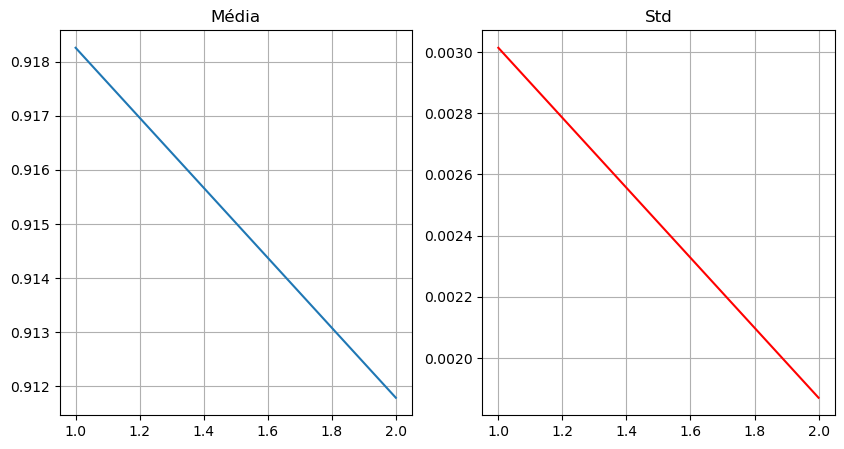

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(comite_mean_test_score)+1), y=comite_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(comite_std_test_score)+1), y=comite_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [ ]:
comite.fit(X_tr_og_norm, y_tr)

VotingClassifier(estimators=[('mlp_0',
                              MLPClassifier(activation='tanh', alpha=0.001,
                                            early_stopping=True,
                                            hidden_layer_sizes=(50, 50),
                                            random_state=4)),
                             ('mlp_1',
                              MLPClassifier(alpha=0.01, early_stopping=True,
                                            hidden_layer_sizes=(50, 50),
                                            random_state=2, solver='sgd'))],
                 voting='soft')

In [ ]:
joblib.dump(comite, "/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/comiteMLP.pkl")

In [ ]:
#treinamento
y_pred_train = comite.predict(X_tr_og_norm)

In [ ]:
#teste
y_pred = comite.predict(X_test_norm)

Acurácia

In [ ]:
#treinamento
treinamento_acc = comite.score(X_tr_og_norm, y_tr)

In [ ]:
#teste
teste_acc = comite.score(X_test_norm, y_test)

F1-score

In [ ]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [ ]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [ ]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_precision = precision_score(y_test, y_pred)

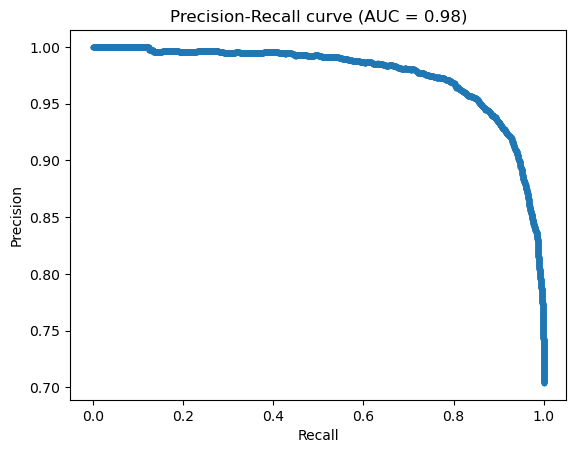

In [ ]:
from sklearn.metrics import auc
y_scores = comite.predict_proba(X_test_norm)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [ ]:
modelo, etapa, acc, f1, recall, precision, auc = ["comiteMlp", "comiteMlp"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_comiteMlp = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_comiteMlp

,modelo,etapa,métrica,valor
0,comiteMlp,treino,accuracy,0.900148
1,comiteMlp,teste,accuracy,0.891595
2,comiteMlp,treino,f1,0.929978
3,comiteMlp,teste,f1,0.923482
4,comiteMlp,treino,recall,0.941864
5,comiteMlp,teste,recall,0.929239
6,comiteMlp,treino,precision,0.918389
7,comiteMlp,teste,precision,0.917796
8,comiteMlp,treino,auc,0.000000
9,comiteMlp,teste,auc,0.976230


In [ ]:
df_long_comiteMlp.to_csv("/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/data/df_long_comiteMlp.csv", index=False)

<Axes: xlabel='métrica', ylabel='valor'>

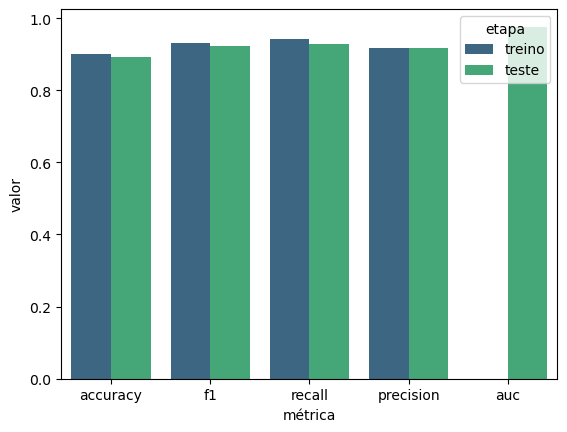

In [ ]:
sns.barplot(df_long_comiteMlp, x="métrica", y="valor", hue="etapa", palette="viridis")

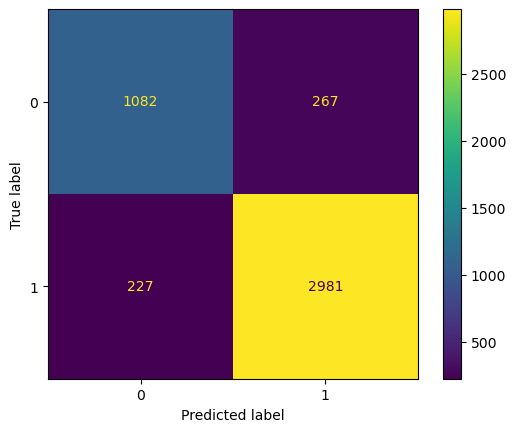

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, objective="binary:hinge")

In [ ]:
param_grid = {
    "n_estimators": np.arange(5, 100, 1),
    "max_leaves": np.arange(0,101,5),
    "grow_policy": ["depthwise", "lossguide"],
    "booster": ["gbtree", "gblinear", "dart"],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": np.arange(1, 17)
}

Estimativa de tempo

In [ ]:
tempo_execucao(xgb, param_grid, cv, X_train, y_train)

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tempo de execução: 81.05 segundos, para uma iteração
Tempo de execução: 27 minutos e 1 segundos, para 20 iterações


In [ ]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(xgb, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

In [ ]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9289533995416348
Modelo 1: 0.9279571947257788
Modelo 2: 0.9279020845285906
Modelo 3: 0.9287901990811639
Modelo 4: 0.9292001530807501
Modelo 5: 0.9273528847996934
Modelo 6: 0.9288575243181385
Modelo 7: 0.9286943223093099
Modelo 8: 0.9294050124354314
Modelo 9: 0.9274085424248228
Modelo 10: 0.9280520474550326
Modelo 11: 0.9279969360398315
Modelo 12: 0.921685587839138
Modelo 13: 0.9262310787507185
Modelo 14: 0.929787641094318
Modelo 15: 0.9264565425023877
Modelo 16: 0.9288032067188394
Modelo 17: 0.9269319051262433
Modelo 18: 0.9250714966634891
Modelo 19: 0.9252193819152995


In [ ]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [ ]:
dic_modelos[f"modelo_{idx}"].best_params_

{'n_estimators': 43,
 'max_leaves': 15,
 'max_depth': 6,
 'grow_policy': 'lossguide',
 'criterion': 'entropy',
 'booster': 'dart'}

In [ ]:
xgb = dic_modelos[f"modelo_{idx}"].best_estimator_
xgb

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=15,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=43, n_jobs=None, ...)

In [ ]:
xgb_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
xgb_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
xgb_mean_test_score, xgb_std_test_score

(array([0.91680725, 0.91706382, 0.87878217, 0.87854693, 0.87399226,
        0.92436192, 0.84950219, 0.83374703, 0.9038432 , 0.92245613]),
 array([0.00346864, 0.00326988, 0.00471063, 0.0043717 , 0.00322544,
        0.00330207, 0.00162735, 0.00138798, 0.00250827, 0.00301696]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

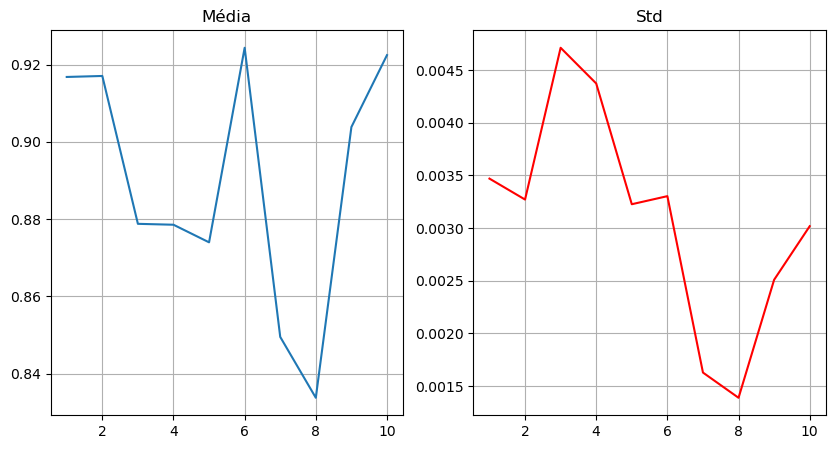

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(xgb_mean_test_score)+1), y=xgb_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(xgb_std_test_score)+1), y=xgb_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [ ]:
xgb.fit(X_tr_og, y_tr)

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:32:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=15,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=43, n_jobs=None, ...)

In [ ]:
joblib.dump(xgb, "/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/xgb.pkl")

In [ ]:
#treinamento
y_pred_train = xgb.predict(X_tr_og)

In [ ]:
#teste
y_pred = xgb.predict(X_test)

Acurácia

In [ ]:
#treinamento
treinamento_acc = xgb.score(X_tr_og, y_tr)

In [ ]:
#teste
teste_acc = xgb.score(X_test, y_test)

F1-score

In [ ]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [ ]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [ ]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_precision = precision_score(y_test, y_pred)

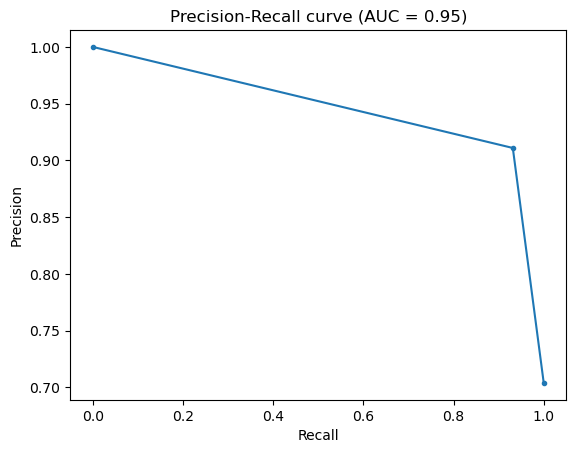

In [ ]:
from sklearn.metrics import auc
y_scores = xgb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [ ]:
modelo, etapa, acc, f1, recall, precision, auc = ["xgb", "xgb"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_xgb = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_xgb

,modelo,etapa,métrica,valor
0,xgb,treino,accuracy,0.916936
1,xgb,teste,accuracy,0.887645
2,xgb,treino,f1,0.941917
3,xgb,teste,f1,0.921085
4,xgb,treino,recall,0.956671
5,xgb,teste,recall,0.931421
6,xgb,treino,precision,0.927611
7,xgb,teste,precision,0.910976
8,xgb,treino,auc,0.000000
9,xgb,teste,auc,0.945337


In [ ]:
df_long_xgb.to_csv("/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/data/df_long_xgb.csv", index=False)

<Axes: xlabel='métrica', ylabel='valor'>

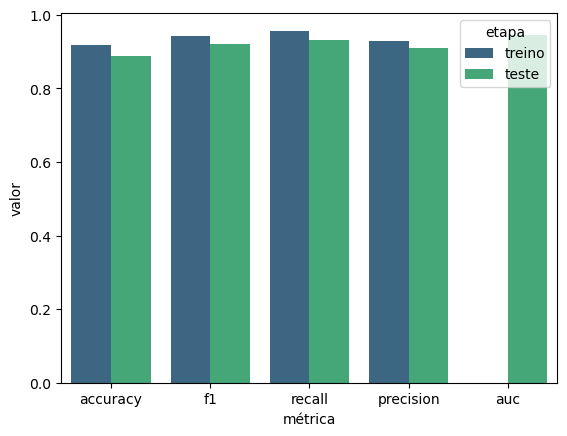

In [ ]:
sns.barplot(df_long_xgb, x="métrica", y="valor", hue="etapa", palette="viridis")

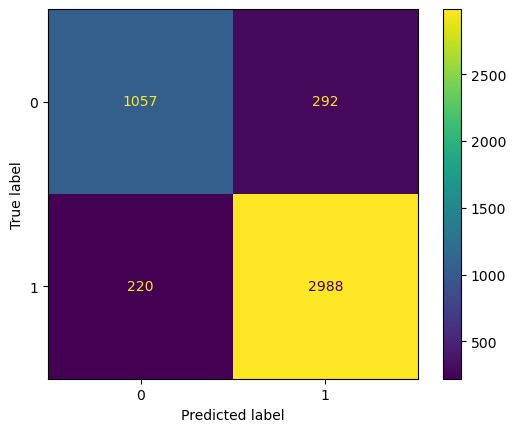

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## LighGBM

In [ ]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(random_state=42, subsample=0.8, objective="binary", metric="f1")

In [ ]:
param_grid = {
    "boosting_type": ["gbdt", "dart", "rf"],
    "n_estimators": np.arange(50, 251, 25),
    "learning_rate": np.linspace(0.01, 0.15, 25),
    "num_leaves": np.arange(5,101,5),
    "max_depth": np.arange(1, 10)
}

Estimativa de tempo

In [ ]:
tempo_execucao(lgbm, param_grid, cv, X_train, y_train)

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1560, in fit
    super().fit(
  File "c:\Users\Usuário\anaconda3\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    self._Booster = train(
                    ^^^^^^
  File "c:\Users\Usuário\anaconda3\Lib\site-packa

[LightGBM] [Info] Number of positive: 10265, number of negative: 4316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 14581, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703998 -> initscore=0.866411
[LightGBM] [Info] Start training from score 0.866411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
dic_modelos = {}
for i in range(20):
    modelo = RandomizedSearchCV(lgbm, 
                                param_distributions=param_grid,
                                n_iter=10,
                                cv=cv,
                                scoring='f1',
                                n_jobs=-1,
                            random_state=i).fit(X_train, y_train)

    dic_modelos[f"modelo_{i}"] = modelo

In [ ]:
f1_scores = []
for i in range(20):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

Modelo 0: 0.9097772744431861
Modelo 1: 0.930223666602944


Modelo 2: 0.930836836071838
Modelo 3: 0.9295612009237876
Modelo 4: 0.929350947731189
Modelo 5: 0.9276807980049875
Modelo 6: 0.9315173604450413
Modelo 7: 0.9274085424248228
Modelo 8: 0.9291579148367386
Modelo 9: 0.9306779011872846
Modelo 10: 0.9269319051262433
Modelo 11: 0.9321058688147296
Modelo 12: 0.9285714285714286
Modelo 13: 0.9335637480798771
Modelo 14: 0.9319571865443425
Modelo 15: 0.9281471546273232
Modelo 16: 0.9257208325377124
Modelo 17: 0.93207981580967
Modelo 18: 0.9301167911162167
Modelo 19: 0.9304730894464662


In [ ]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [ ]:
dic_modelos[f"modelo_{idx}"].best_params_

{'num_leaves': 75,
 'n_estimators': 225,
 'max_depth': 7,
 'learning_rate': 0.12666666666666665,
 'boosting_type': 'gbdt'}

In [ ]:
lgbm = dic_modelos[f"modelo_{idx}"].best_estimator_
lgbm

LGBMClassifier(learning_rate=0.12666666666666665, max_depth=7, metric='f1',
               n_estimators=225, num_leaves=75, objective='binary',
               random_state=42, subsample=0.8)

In [ ]:
lgbm_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
lgbm_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
lgbm_mean_test_score, lgbm_std_test_score

(array([       nan, 0.89703406,        nan, 0.92819904,        nan,
        0.92598993, 0.92738704, 0.92662322,        nan, 0.92464636]),
 array([       nan, 0.0025473 ,        nan, 0.00185332,        nan,
        0.00237533, 0.00151959, 0.00152101,        nan, 0.00181703]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

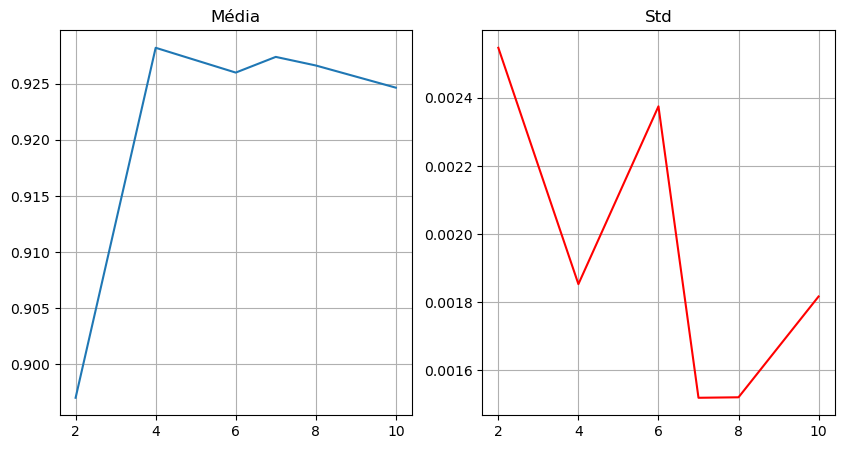

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(lgbm_mean_test_score)+1), y=lgbm_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(lgbm_std_test_score)+1), y=lgbm_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [ ]:
lgbm.fit(X_tr_og, y_tr)

[LightGBM] [Info] Number of positive: 12832, number of negative: 5395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 18227, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.704011 -> initscore=0.866469
[LightGBM] [Info] Start training from score 0.866469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(learning_rate=0.12666666666666665, max_depth=7, metric='f1',
               n_estimators=225, num_leaves=75, objective='binary',
               random_state=42, subsample=0.8)

In [ ]:
joblib.dump(lgbm, "/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/lgbm.pkl")

In [ ]:
#treinamento
y_pred_train = lgbm.predict(X_tr_og)

In [ ]:
#teste
y_pred = lgbm.predict(X_test)

Acurácia

In [ ]:
#treinamento
treinamento_acc = lgbm.score(X_tr_og, y_tr)

In [ ]:
#teste
teste_acc = lgbm.score(X_test, y_test)

F1-score

In [ ]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [ ]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [ ]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_precision = precision_score(y_test, y_pred)

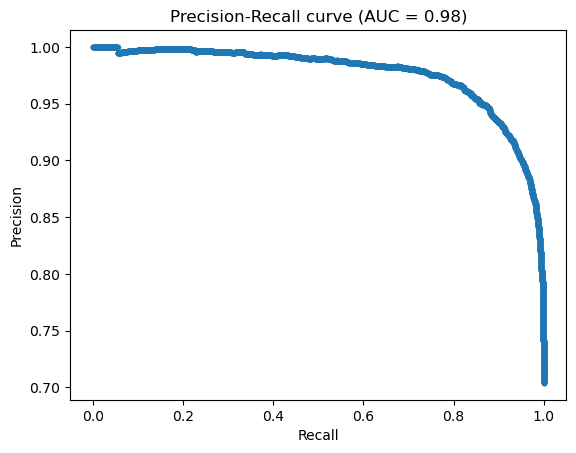

In [ ]:
from sklearn.metrics import auc
y_scores = lgbm.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [ ]:
modelo, etapa, acc, f1, recall, precision, auc = ["lgbm", "lgbm"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_lgbm = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_lgbm

,modelo,etapa,métrica,valor
0,lgbm,treino,accuracy,0.998683
1,lgbm,teste,accuracy,0.890718
2,lgbm,treino,f1,0.999065
3,lgbm,teste,f1,0.922671
4,lgbm,treino,recall,0.999532
5,lgbm,teste,recall,0.926122
6,lgbm,treino,precision,0.998599
7,lgbm,teste,precision,0.919245
8,lgbm,treino,auc,0.000000
9,lgbm,teste,auc,0.976813


In [ ]:
df_long_lgbm.to_csv("/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/data/df_long_lgbm.csv", index=False)

<Axes: xlabel='métrica', ylabel='valor'>

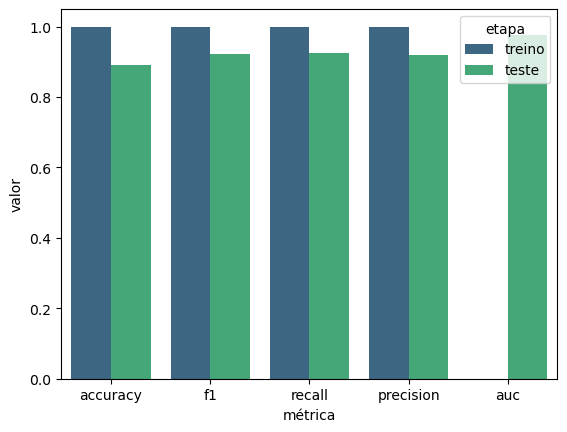

In [ ]:
sns.barplot(df_long_lgbm, x="métrica", y="valor", hue="etapa", palette="viridis")

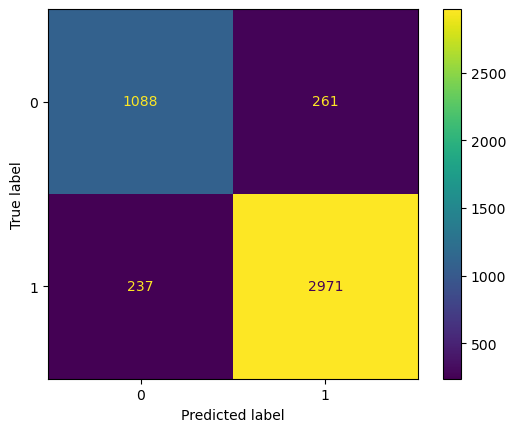

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Comitê Heterogêneo

In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
modelos = {"forest": forest, "xgb": xgb, "lgbm": lgbm, "tree": tree}

In [ ]:
def random_select_modelos(modelos):
    lista = np.random.choice(list(modelos.keys()), size=np.random.randint(2,len(modelos)), replace=False)
    return [(f"{modelo}", modelos[modelo]) for modelo in lista]

In [ ]:
for i in range(10):
    print(f"\n🔄 Rodando RandomizedSearchCV - Execução {i+1}/10 🔄")

    selected_models = random_select_modelos(modelos)  
    voting_clf = VotingClassifier(estimators=selected_models)

    param_distributions = {"voting": ['soft', 'hard']}

    modelo = RandomizedSearchCV(
        estimator=voting_clf,
        param_distributions=param_distributions,
        n_iter=2, 
        cv=cv,
        scoring='f1',
        random_state=i,
        n_jobs=-1
    ).fit(X_train_norm, y_train)
    dic_modelos[f"modelo_{i}"] = modelo


🔄 Rodando RandomizedSearchCV - Execução 1/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 2/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 3/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 4/10 🔄
[LightGBM] [Info] Number of positive: 10265, number of negative: 4316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 14581, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703998 -> initscore=0.866411
[LightGBM] [Info] Start training from score 0.866411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 5/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 6/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 7/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:42:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 10265, number of negative: 4316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 14581, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703998 -> initscore=0.866411
[LightGBM] [Info] Start training from score 0.866411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 10265, number of negative: 4316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 14581, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703998 -> initscore=0.866411
[LightGBM] [Info] Start training from score 0.866411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔄 Rodando RandomizedSearchCV - Execução 10/10 🔄


c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 10265, number of negative: 4316
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 14581, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703998 -> initscore=0.866411
[LightGBM] [Info] Start training from score 0.866411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
f1_scores = []
for i in range(10):
    y_pred = dic_modelos[f"modelo_{i}"].best_estimator_.predict(X_val)
    f1_scores.append(f1_score(y_val, y_pred))
    print(f"Modelo {i}: {f1_score(y_val, y_pred)}")

c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Modelo 0: 0.826331884757766
Modelo 1: 0.826331884757766
Modelo 2: 0.826331884757766
Modelo 3: 0.826331884757766


c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklea

Modelo 4: 0.826331884757766
Modelo 5: 0.826331884757766
Modelo 6: 0.826331884757766
Modelo 7: 0.826331884757766
Modelo 8: 0.826331884757766
Modelo 9: 0.826331884757766


c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Usuário\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
f1_scores = np.array(f1_scores)
idx = f1_scores.argmax()

In [ ]:
dic_modelos[f"modelo_{idx}"].best_params_

{'voting': 'soft'}

In [ ]:
comite = dic_modelos[f"modelo_{idx}"].best_estimator_
comite

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=8,
                                                     max_features=14,
                                                     max_leaf_nodes=13,
                                                     min_samples_leaf=3,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            criterion='entropy', device=None,
                                            early_stopping_round...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=15,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=43, n_jobs=None, ...)),
                             ('forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=14,
                                                     max_features=7,
                                                     max_leaf_nodes=16,
                                                     min_samples_leaf=13,
                                                     min_samples_split=17,
                                                     n_estimators=130,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
comite_mean_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["mean_test_score"]
comite_std_test_score = dic_modelos[f"modelo_{idx}"].cv_results_["std_test_score"]
comite_mean_test_score, comite_std_test_score

(array([0.91941502, 0.90999019]), array([0.00269289, 0.00118752]))

c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuário\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

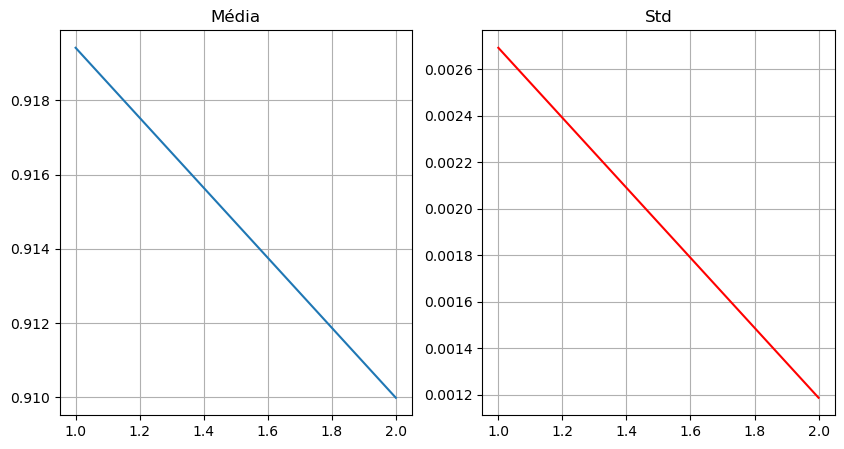

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

sns.lineplot(x=np.arange(1, len(comite_mean_test_score)+1), y=comite_mean_test_score, ax=ax[0])

ax[0].set_title("Média")
ax[0].grid()

sns.lineplot(x=np.arange(1, len(comite_std_test_score)+1), y=comite_std_test_score, ax=ax[1], color='red')
ax[1].set_title("Std")
ax[1].grid()
plt.show()

Treinamento com a base de treino inteira (80%)

In [ ]:
comite.fit(X_tr_og, y_tr)

c:\Users\Usuário\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=8,
                                                     max_features=14,
                                                     max_leaf_nodes=13,
                                                     min_samples_leaf=3,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            criterion='entropy', device=None,
                                            early_stopping_round...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=15,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=43, n_jobs=None, ...)),
                             ('forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=14,
                                                     max_features=7,
                                                     max_leaf_nodes=16,
                                                     min_samples_leaf=13,
                                                     min_samples_split=17,
                                                     n_estimators=130,
                                                     random_state=42))],
                 voting='soft')

In [ ]:
joblib.dump(comite, "/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/comiteHet.pkl")

In [ ]:
#treinamento
y_pred_train = comite.predict(X_tr_og)

In [ ]:
#teste
y_pred = comite.predict(X_test)

Acurácia

In [ ]:
#treinamento
treinamento_acc = comite.score(X_tr_og, y_tr)

In [ ]:
#teste
teste_acc = comite.score(X_test, y_test)

F1-score

In [ ]:
#treinamento
treinamento_f1 = f1_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_f1 = f1_score(y_test, y_pred)

Recall

In [ ]:
#treinamento
treinamento_recall = recall_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_recall = recall_score(y_test, y_pred)

Precision

In [ ]:
#treinamento
treinamento_precision = precision_score(y_tr, y_pred_train)

In [ ]:
#teste
teste_precision = precision_score(y_test, y_pred)

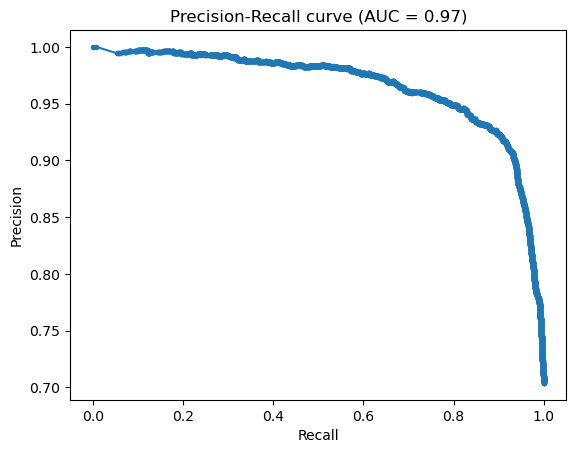

In [ ]:
from sklearn.metrics import auc
y_scores = comite.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.show()


In [ ]:
modelo, etapa, acc, f1, recall, precision, auc = ["comiteHet", "comiteHet"], ["treino", "teste"], [treinamento_acc, teste_acc], [treinamento_f1, teste_f1], [treinamento_recall, teste_recall], [treinamento_precision, teste_precision], [0, pr_auc]


df_resultados = pd.DataFrame({
    "modelo": modelo,
    "etapa": etapa,
    "accuracy": acc,
    "f1": f1,
    "recall": recall,
    "precision": precision,
    "auc": auc
})

df_long_comiteHet = df_resultados.melt(id_vars=["modelo", "etapa"], var_name="métrica", value_name="valor")
df_long_comiteHet

,modelo,etapa,métrica,valor
0,comiteHet,treino,accuracy,0.902946
1,comiteHet,teste,accuracy,0.881282
2,comiteHet,treino,f1,0.932612
3,comiteHet,teste,f1,0.917266
4,comiteHet,treino,recall,0.953943
5,comiteHet,teste,recall,0.934850
6,comiteHet,treino,precision,0.912214
7,comiteHet,teste,precision,0.900330
8,comiteHet,treino,auc,0.000000
9,comiteHet,teste,auc,0.965882


In [ ]:
df_long_comiteHet.to_csv("/content/drive/MyDrive/Portfólio/Projetos/Projeto AM/data/df_long_comiteHet.csv", index=False)

<Axes: xlabel='métrica', ylabel='valor'>

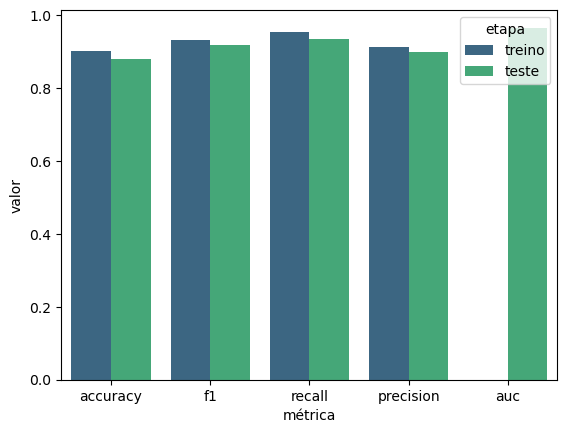

In [ ]:
sns.barplot(df_long_comiteHet, x="métrica", y="valor", hue="etapa", palette="viridis")

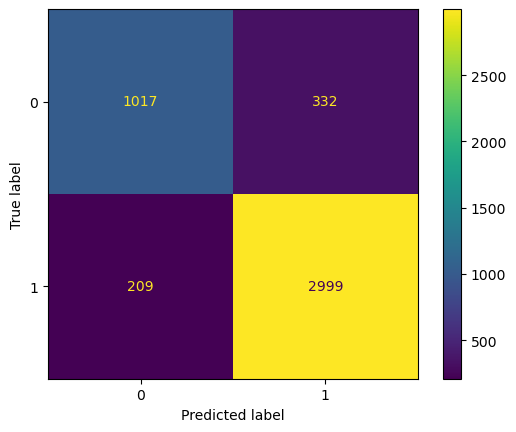

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()